#### Group Members

* Hovekamp, Amadeus
* Klaiber, Megan
* Weilbach, Juliane

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.linalg as la

#### helper functions

In [2]:
# check if matrix is quadratic and a 2x2 matrix
def is_2x2_matrix(matrix):
    dim = np.shape(matrix)
    if dim[0] != dim[1]:
        print('Matrix is not quadratic!')
        return False
    elif dim[0] != 2:
        print('Matrix is not a 2x2 matrix!')
        return False
    else:
        return True


def matrixMultiplication(matrixA, matrixB):
    dimsA = np.shape(matrixA)
    dimsB = np.shape(matrixB)
    
    #print("matrixA\n", matrixA)
    #print("dimsA", dimsA)
    #print("matrixB\n", matrixB)
    #print("dimsB", dimsB)
    
    if(dimsA[1] != dimsB[0]):
        print("Error. Matrix dimensions do not fit!")
    else:
        # init result matrix with zeros of correct shape
        matrixC = np.zeros((dimsA[0], dimsB[1]))
        
        for rowA in range(0, dimsA[0]):
            for colB in range(0, dimsB[1]):
                for k in range(0, dimsA[1]):
                    matrixC[rowA, colB] += matrixA[rowA, k] * matrixB[k, colB]
        return matrixC
    
#A = np.array([[2,1],[1,1],[2,1]])
#B = np.array([[2,1,1],[3,2,3]])
#C = matrixMultiplication(A , B)
#C_correct = np.matmul(A , B)
#print("C\n", C)
#print("C_correct\n", C_correct)

In [3]:
def row_swapping_matrix(rows_total, row_from, row_to):
    P = np.identity(rows_total)
    P[row_from,row_from] = 0
    P[row_to,row_to] = 0
    P[row_from,row_to] = 1
    P[row_to,row_from] = 1
    return P

def add_row_to_another_row_matrix(rows_total, row_from, row_to):
    P = np.identity(rows_total)
    P[row_from, row_to] += 1
    return P

def scale_row_matrix(rows_total, row, factor):
    if(factor != 0):
        P = np.identity(rows_total)
        P[row, row] *= factor
        return P
    else:
        print("Error! Factor must be non-zero!")
        return None


def forward_substitution(LowertriangularMatrix, RightHandSide):
    ### LowertriangularMatrix must be an lowertriangular matrix and RightHandSide a vector
    ### solves the problem LowertriangularMatrix x = RightHandSide
    L = np.copy(LowertriangularMatrix)
    b = np.copy(RightHandSide)
    
    n = L.shape[0]
    result = np.zeros(n)
    
    for i in range(n):
        result[i] = b[i]/L[i,i]
        for j in range(i+1, n):
            b[j] -= L[j,i] * result[i]
            L[j,i] = 0
        b[i] *= 1./L[i,i]
        L = matrixMultiplication(scale_row_matrix(n, i, 1/L[i,i]), L)
    return result
    

def backward_substitution(UppertriagularMatrix, RightHandSide):
    ### U must be an uppertriangular matrix and b a vector
    ### solves the problem Ux=b
    print("\n\nBackward_substitution called.")
    
    U = np.copy(UppertriagularMatrix)
    b = np.copy(RightHandSide)
    print("U:\n", U)
    print("b:\n", b)
    
    n = U.shape[0]
    # print("number of rows of U:\n", n)
    result = np.zeros((n, 1))
    for i in range(n)[::-1]:
        result[i] = b[i] / U[i,i]
        # print("result[%d]:\n"%i, result[i])
        for k in range(i)[::-1]:
            # print("b[%d]:\n" % k, b[k])
            # print("U[%d, %d]:\n" % (k,i), U[k, i])
            b[k] -= U[k,i] * result[i]
            # print("b[%d]:\n" %(k), b[k])
            U[k,i] = 0
        b[i] *= 1./U[i,i]
        U = matrixMultiplication(scale_row_matrix(n, i, 1./U[i,i]), U)
        # print("U:\n", U)
        # print("b:\n", b)
    return result

In [4]:
# https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/
def gaussian_elemination(matrix_A, vector_b):
    equationSystem = np.hstack((matrix_A, vector_b))
    print("\nSolve equation system:\nMatrix | Vector \n", equationSystem)
    n = equationSystem.shape[0]
    for i in range(n):
        maxEl = np.abs(equationSystem[i,i])
        maxRow = i
        for k in range(i+1, n):
            if np.abs(equationSystem[k,i]) > maxEl:
                maxEl = equationSystem[k,i]
                maxRow = k
        
        if i != maxRow:
            # print("Swap row %d with row %d" % (i, maxRow))
            equationSystem = matrixMultiplication(row_swapping_matrix(n,i,maxRow), equationSystem)
            # print("matrix after switching greatest element of column to the top:\n", equationSystem)
        
        for k in range(i+1, n):
            # print("equationSystem[%d,%d] =" %(i, i), equationSystem[i,i])
            # print("equationSystem[%d,%d] =" %(k, i), equationSystem[k,i])
            
            c = -equationSystem[k,i] / equationSystem[i,i]
            if(equationSystem[k,i] != 0):
                # print("c is: ", c)
                equationSystem = matrixMultiplication(scale_row_matrix(n, i, c), equationSystem)
                # print("equationSystem after scaling row %d:\n" % (i+1), equationSystem)
                equationSystem = matrixMultiplication(add_row_to_another_row_matrix(n, k, i), equationSystem)
                # print("equationSystem adding rows %d and %d:\n" % (i+1, k+1), equationSystem)
            else:
                print("element already 0, skip.")
    
    # solve equation for upper triangle matrix
    x = backward_substitution(equationSystem[:,:n],equationSystem[:,n])
    return x

In [5]:
# ABC = np.matrix([[2, 0, 0],[2, 2, 0],[0, 4, 2]])
# d = np.matrix([[5], [3], [2]])

ABC = np.matrix([[2, 4, 3],[2, 2, 3],[4, 15, 2]])
print("ABC:\n", ABC)
d = np.matrix([[5], [3], [2]])
print("d:\n", d)
DEF = gaussian_elemination(ABC, d)

print("Solution of the equation system:\n", DEF)
print("Test solution:\n", matrixMultiplication(ABC, DEF))

ABC:
 [[ 2  4  3]
 [ 2  2  3]
 [ 4 15  2]]
d:
 [[5]
 [3]
 [2]]

Solve equation system:
Matrix | Vector 
 [[ 2  4  3  5]
 [ 2  2  3  3]
 [ 4 15  2  2]]


Backward_substitution called.
U:
 [[-2.         -7.5        -1.        ]
 [ 0.          3.5        -1.27272727]
 [ 0.          0.          0.72727273]]
b:
 [-1.         -1.27272727  2.72727273]
Solution of the equation system:
 [[-5.125]
 [ 1.   ]
 [ 3.75 ]]
Test solution:
 [[ 5.]
 [ 3.]
 [ 2.]]


## Assignment 1

### 1. Jupyter Notebooks

**(d)** It's useful for people who didn't worked with jupyter notebooks yet.

### 2. Eigenvalue Decomposition
Given the matrix $A=\frac{1}{4}\left[ \begin{array}{rr}
7 & -\sqrt{3}  \\
-\sqrt{3} & 5  \\
\end{array}\right]$.

#### (a) Compute the eigenvalue decomposition $A=QΛQ^T$ with $Λ=diag(λ_1,λ_2)$.

In [6]:
A = 1/4 * np.array([[7, -np.sqrt(3)], [-np.sqrt(3), 5]])

# pq formula
def pq_formula(p, q):
    p_half = -p/2
    sqrt = np.sqrt(p_half**2 - q)
    lamda_1 = p_half + sqrt 
    lamda_2 = p_half - sqrt
    return np.array([lamda_1, lamda_2])

# compute eigenvalues
def eigenvalues(matrix):
    if is_2x2_matrix(matrix):
        a = matrix[0,0]
        b = matrix[0,1]
        c = matrix[1,0]
        d = matrix[1,1]

        p = -(a+d)
        q = a*d-b*c

        eigenvals = pq_formula(p, q)
    
        #print('Calculated eigenvalues:\n', eigenvals)
        return eigenvals
    else:
        print("Error! eigenvalues only supports 2x2 matrices!")

# compute eigenvectors
def eigenvectors(matrix, eigenvals):
    if is_2x2_matrix(matrix):
        eigenvec = []
        a = matrix[0,0]
        b = matrix[0,1]
        c = matrix[1,0]
        d = matrix[1,1]
        if c != 0:
            eigenvec.append([eigenvals[0]-d,c])
            eigenvec.append([eigenvals[1]-d,c])
        elif b != 0:
            eigenvec.append([b,eigenvals[0] - a])
            eigenvec.append([b,eigenvals[1] - a])
        else:
            eigenvec.append([1,0])
            eigenvec.append([0,1])

        # print("before scaling:", eigenvec)
        for eigvec in eigenvec:
            length = np.sqrt(eigvec[0]**2+eigvec[1]**2)
            eigvec[0] /= length
            eigvec[1] /= length
        # print("after scaling:", eigenvec)
        return eigenvec
    else:
        print("Error! eigenvectors only supports 2x2 matrices!")
    
# compute eigenvalue decomposition
def eigenvalue_decomposition(matrix):
    print('Matrix:\n', matrix)
    if is_2x2_matrix(matrix):
        # compute eigenvalues
        values = eigenvalues(matrix)
        # compute eigenvectors
        vectors = eigenvectors(matrix, values)
        
        Lambda = np.diag(values)
        Q = np.array(vectors)
        
        print('\nDiagonal matrix Lambda with eigenvalues:\n', Lambda,
              '\n\nMatrix Q with eigenvectors as columns:\n', Q)
        print('\nSo A = Q * Lambda * Q.T:\n',
              matrixMultiplication(matrixMultiplication(Q, Lambda) , np.transpose(Q)))
        return Lambda, Q
    else:
        print("Error! eigenvalue_decomposition only supports 2x2 matrices!")
        

'''
eigenvalues_of_A = eigenvalues(A)
print("Q:\n", Q)
print("v:\n", Q[0])
print("|v|:\n", np.linalg.norm(Q[0]))

# compare to np.linalg.eig:
eigval, eigvec = np.linalg.eig(A.T)
print("numpy eigval", eigval)
print("numpy eigvec:", eigvec)
'''
Lambda, Q = eigenvalue_decomposition(A)


Matrix:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]]

Diagonal matrix Lambda with eigenvalues:
 [[ 2.  0.]
 [ 0.  1.]] 

Matrix Q with eigenvectors as columns:
 [[ 0.8660254 -0.5      ]
 [-0.5       -0.8660254]]

So A = Q * Lambda * Q.T:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]]


#### (b) Show that the columns of Q are orthonormal, i.e. the columns are of unit length and orthogonal.

In [7]:
# compute the dot product of two vectors
def dot_product(vec1, vec2):
    dim_vec1 = np.shape(vec1)
    dim_vec2 = np.shape(vec2)
    # check if vectors have same dimension
    if dim_vec1 != dim_vec2:
        print('Input vectors have not the same dimension!')
    else:
        scalar = 0
        for i in range(0, dim_vec1[0]):
            scalar += vec1[i] * vec2[i]
        return round(scalar,2)
    
# compute the length of a vector
def vec_length(col):
    dim = np.shape(col)
    # check if input is a column
    if len(dim) != 1:
        print('Input is not a column!')
        return False
    else:
        x = 0
        for i in range(0,dim[0]):
            x += col[i]**2
        return np.sqrt(x)

# check if columns of a 2x2 matrix are orthonormal
def orthonormal_columns(matrix):
    # dimension of input matrix
    dim = np.shape(matrix)
    
    if is_2x2_matrix(matrix):
        # check if columns are of unit length
        for j in range(0,dim[1]):
            if vec_length(matrix[:,j]) != 1:
                print('Columns of the matrix are not of unit length!')
                return False

        # check if columns are orthognal
        if dot_product(matrix[:,0], matrix[:,1]) == 0:
            print('The columns of the matrix are orthonormal!')
            return True
        else:
            print('The columns of the matrix are not orthonormal!')
            return False
    else:
        print("Error! orthornormal_columns only supports 2x2 matrices!")
        
print('Q:\n',Q, '\n')
orthonormal_columns(Q)

Q:
 [[ 0.8660254 -0.5      ]
 [-0.5       -0.8660254]] 

The columns of the matrix are orthonormal!


True

#### (c) Show that the matrix $QΛ^{-1}Q^T$ is the inverse of A.

In [8]:
# calculate inverse for a 2x2 matrix
def inverse(matrix):
    if is_2x2_matrix(matrix):
        a = matrix[0,0]
        b = matrix[0,1]
        c = matrix[1,0]
        d = matrix[1,1]
        
        inv = 1 /(a*d-b*c) * np.array([[d, -b], [-c, a]])
    
        return inv
    else:
        print("Error! inverse only supports 2x2 matrices!")

print('Q:\n',Q, '\n')
print('Lambda:\n',Lambda, '\n')
print('Inverse of Lambda:\n', inverse(Lambda), '\n')

print('A:\n', A, '\n')
# inverse of A
print('Inverse of A:\n', inverse(A), '\n')
# result with matrix multiplication
print('\nSo inv(A) = Q * inv(Lambda) * Q.T:\n', matrixMultiplication( matrixMultiplication(Q, inverse(Lambda)),np.transpose(Q)))

Q:
 [[ 0.8660254 -0.5      ]
 [-0.5       -0.8660254]] 

Lambda:
 [[ 2.  0.]
 [ 0.  1.]] 

Inverse of Lambda:
 [[ 0.5 -0. ]
 [-0.   1. ]] 

A:
 [[ 1.75      -0.4330127]
 [-0.4330127  1.25     ]] 

Inverse of A:
 [[ 0.625       0.21650635]
 [ 0.21650635  0.875     ]] 


So inv(A) = Q * inv(Lambda) * Q.T:
 [[ 0.625       0.21650635]
 [ 0.21650635  0.875     ]]


**(d)** We invested approximately 4 hours for this exercise. It was time consuming to code all the simple things on our own. But we think for people who didn't worked with python yet this is useful to learn it.

### 3. Matrix Inversion
Given the matrix $A=\left[ \begin{array}{rr}
3 & 4  \\
6 & 13  \\
\end{array}\right]$.

#### (a) Compute $LU$ decomposition of it, i.e. $A=L\cdot U$, where *L* is a lowertriangular matrix and *U* is an uppertriangular matrix. Use this decomposition to solve $A\cdot x=b$ with $b=(1,2)^T$ via forward and backward substitution.

See: <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html"> SciPy Documentation for LU decomposition </a>
and
<a href="https://www.youtube.com/watch?v=rhNKncraJMk">  LU decomposition </a> and <a href="https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/">  Gaussian Elimination </a>

In [9]:
def lu_decomposition_2x2(matrix):
    print("lu_decomposition called with matrix:\n", matrix)
    dim = np.shape(matrix)
    # print("dimensions of matrix:\n", dim)
        
    l = np.identity(dim[0])
    u = matrix.copy()
    l[1,0] = matrix[1,0] / u[0,0]
    u[1,0] = 0
    u[1,1] = matrix[1,1] - l[1,0] * u[0,1]
        
    return l, u

A = np.array([[3., 4.],
              [6., 13.]])
print("A\n", A)
b = np.array([[1.],[2.]])
print("b\n", b)

# print("Dimension test:\n", matrixMultiplication(A,b))

L, U = lu_decomposition_2x2(A)
print("L:\n", L)
print("U:\n", U)
print("Testing LU_decomposition: LU = \n", matrixMultiplication(L,U))

## compare with numpy's solution 
P, L_numpy, U_numpy = la.lu(A)
print("P\n", P)
print("L_numpy\n", L_numpy)
print("U_numpy\n", U_numpy)
# print("Testing LU_decomposition: LU = \n", matrixMultiplication(P, matrixMultiplication(L_numpy, U_numpy)))

A
 [[  3.   4.]
 [  6.  13.]]
b
 [[ 1.]
 [ 2.]]
lu_decomposition called with matrix:
 [[  3.   4.]
 [  6.  13.]]
L:
 [[ 1.  0.]
 [ 2.  1.]]
U:
 [[ 3.  4.]
 [ 0.  5.]]
Testing LU_decomposition: LU = 
 [[  3.   4.]
 [  6.  13.]]
P
 [[ 0.  1.]
 [ 1.  0.]]
L_numpy
 [[ 1.   0. ]
 [ 0.5  1. ]]
U_numpy
 [[  6.   13. ]
 [  0.   -2.5]]


In [10]:
# Ax = (LU)x = b
# x = A^(-1)b = (LU)^(-1)b = U^(-1)L^(-1)b

temp = matrixMultiplication(inverse(L), b)
x = matrixMultiplication(inverse(U), temp)

#### (b) Use Gauss elimination to explicitly calculate the inverse of $A$ and show that it yields the same solution $x = A^{-1}\cdot b$ from part (a).

$\begin{array}{rr|rr}
3 & 4 & 1 & 0 \\
6 & 13 & 0 & 1 \\
\end{array}$

$\begin{array}{rr|rr}
3 & 4 & 1 & 0 \\
0 & 5 & -2 & 1 \\
\end{array}$

$\begin{array}{rr|rr}
3 & 4 & 1 & 0 \\
0 & 1 & \frac{-2}{5} & \frac{1}{5} \\
\end{array}$

$\begin{array}{rr|rr}
3 & 0 & \frac{13}{5} & \frac{-4}{5} \\
0 & 1 & \frac{-2}{5} & \frac{1}{5} \\
\end{array}$

$\begin{array}{rr|rr}
1 & 0 & \frac{13}{15} & \frac{-4}{15} \\
0 & 1 & \frac{-2}{5} & \frac{1}{5} \\
\end{array}$

In [18]:
A = np.matrix([[3,4],[6,13]])
b = np.matrix([[1],[2]])
x = gaussian_elemination(A,b)
print("x:\n", x)

A_inv = inverse(A)
print("A_inv:\n", A_inv)
print("A_inv * 15:\n", A_inv * 15)

print(matrixMultiplication(A_inv, b))


Solve equation system:
Matrix | Vector 
 [[ 3  4  1]
 [ 6 13  2]]


Backward_substitution called.
U:
 [[-3.  -6.5]
 [ 0.  -2.5]]
b:
 [-1.  0.]
x:
 [[ 0.33333333]
 [-0.        ]]
A_inv:
 [[ 0.86666667 -0.26666667]
 [-0.4         0.2       ]]
A_inv * 15:
 [[ 13.  -4.]
 [ -6.   3.]]
[[ 0.33333333]
 [ 0.        ]]


#### (c) TODO feedback

### 4. Vector Norms

#### (a) Compute the  $\lVert\cdot\rVert_{1}, \lVert\cdot\rVert_{2}, \lVert\cdot\rVert_{8}  $ and  $\lVert\cdot \rVert_{\infty} $ norms of the following vectors:  
<center>$x_{1} = \begin{pmatrix}24\\3\\2\\31\end{pmatrix}$, $x_{2} = \begin{pmatrix}27\\20\\26\\21\end{pmatrix}$, $x_{3} = \begin{pmatrix}30\\21\\27\\5\end{pmatrix} $ and $ x_{4} = \begin{pmatrix}26\\28\\25\\14\end{pmatrix}$.</center>



In [12]:
x_1 = np.array([24, 3, 2, 31], dtype='int64')
x_2 = np.array([27, 20, 26, 21], dtype='int64')
x_3 = np.array([30, 21, 27, 5], dtype='int64')
x_4 = np.array([26, 28, 25, 14], dtype='int64')

# calculate the p-norm of vector v
def norm(v, p):
    sum = 0
    for c in v:
        sum += abs(c)**p
    norm = sum**(1/p)
    return norm

# calculate the maximum norm
def maxnorm(v):
    return max(abs(v))

# vectors
x = [x_1, x_2, x_3, x_4]
# norms
p = [1,2,8,'max']
# loop over vectors and norms and print them
for i in range(0,len(x)):
    for j in range(0,len(p)):
        if p[j] == 'max':
            print('The maxnorm of vector {} is:'.format(x[i]), maxnorm(x[i]))
        else:
            print('The {}-norm of vector {} is:'.format(p[j],x[i]), round(norm(x[i],p[j]),2))


The 1-norm of vector [24  3  2 31] is: 60.0
The 2-norm of vector [24  3  2 31] is: 39.37
The 8-norm of vector [24  3  2 31] is: 31.47
The maxnorm of vector [24  3  2 31] is: 31
The 1-norm of vector [27 20 26 21] is: 94.0
The 2-norm of vector [27 20 26 21] is: 47.39
The 8-norm of vector [27 20 26 21] is: 29.38
The maxnorm of vector [27 20 26 21] is: 27
The 1-norm of vector [30 21 27  5] is: 83.0
The 2-norm of vector [30 21 27  5] is: 45.77
The 8-norm of vector [30 21 27  5] is: 31.53
The maxnorm of vector [30 21 27  5] is: 30
The 1-norm of vector [26 28 25 14] is: 93.0
The 2-norm of vector [26 28 25 14] is: 47.76
The 8-norm of vector [26 28 25 14] is: 30.46
The maxnorm of vector [26 28 25 14] is: 28


#### (b) Draw the set of points with $\lVert x\rVert_{i}=1$ for $i \in \{1,2,8,\infty\}$ and $x \in \mathbb{R}^{2}$.

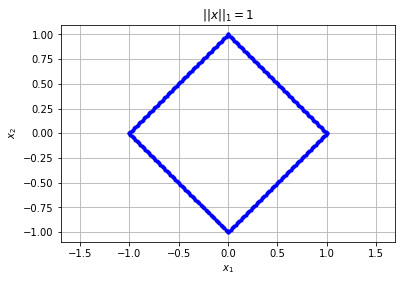

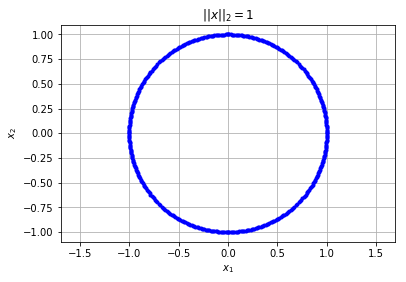

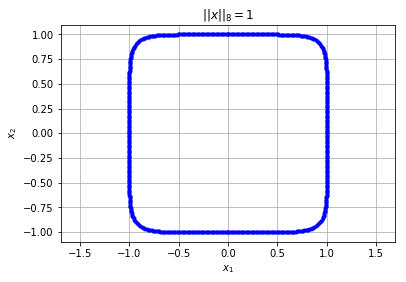

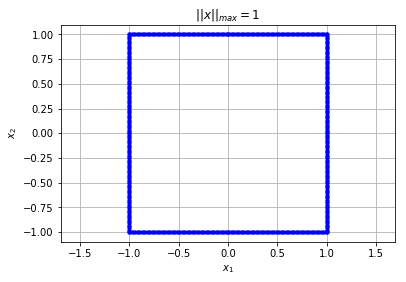

In [13]:
steps = 80
for p in [1,2,8,'max']:
    for x1 in np.linspace(0,1, steps):
        if(p != 'max'):
            x2 = (1 - x1**p)**(1/p)
            plt.title("$||x||_%d=1$" %p)
        else:
            plt.title("$||x||_{max}=1$")
            x2 = 1
        if x1 <= x2:
            # flipp due to symmetry of norms
            # first quadrant
            plt.plot(x1,x2, 'b.')
            plt.plot(x2,x1, 'b.')
            
            # flipped across x_2 axis
            plt.plot(-x1,x2, 'b.')
            plt.plot(-x2,x1, 'b.')
            
            # both flipped across x_1 axis
            plt.plot(x1,-x2, 'b.')
            plt.plot(x2,-x1, 'b.')
            plt.plot(-x1,-x2, 'b.')
            plt.plot(-x2,-x1, 'b.')
    plt.axis('equal')
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$")
    plt.grid()
    plt.show()

**(c)** This question was easy so we didn't invest that much time. It is useful to plot something so we get used to matplotlib.

### 5. Special Orthogonal Matrices

#### (a) Given the matrix 
<center>$A=\frac{1}{2}\left[ \begin{array}{rr}
7 & \sqrt{3}  \\
\sqrt{3} & 5  \\
\end{array}\right]$</center> 
#### compute $det(A), Tr(A)$ and its eigenvalues.

In [14]:
# calculate the determinant of a 2x2 matrix
def determinant(m):
    if is_2x2_matrix(m):
        return m[0][0] * m[1][1] - m[1][0]* m[0][1]
    else:
        print('Error! determinant only supports 2x2 matrices!')
        return False

# calculate the trace of a 2x2 matrix
def trace(m):
    if is_2x2_matrix(m):
        return m[0][0] + m[1][1]
    else:
        print('Error! trace only supports 2x2 matrices!')
        return False

A = 1/2 * np.array([[7, np.sqrt(3)], 
                    [np.sqrt(3), 5]])

print('Matrix A:\n', A)
print('\nThe determinant of matrix A:\n', determinant(A))
print('\nThe trace of matrix A:\n', trace(A))
# used eigenvalues function from above (exercise 2.a)
print('\nEigenvalues of matrix A:\n', eigenvalues(A))

Matrix A:
 [[ 3.5        0.8660254]
 [ 0.8660254  2.5      ]]

The determinant of matrix A:
 8.0

The trace of matrix A:
 6.0

Eigenvalues of matrix A:
 [ 4.  2.]


#### (b) The Matrix <center>$Q(\alpha)=\left[ \begin{array}{rr}
\cos{\alpha} & -\sin{\alpha}  \\
\sin{\alpha} & \cos{\alpha}  \\
\end{array}\right]$</center> 
#### represents a rotation around an axis by the angle $\alpha$. Compute $A^{\prime} = Q \cdot A \cdot Q^{T} ,$ det( $A^{\prime}$), Tr( $A^{\prime}$) and its eigenvalues for $\alpha = \frac{\pi}{12}$.

In [15]:
# matrix Q(alpha)
def Q(alpha):
    return np.array([[math.cos(alpha), -math.sin(alpha)],
            [math.sin(alpha), math.cos(alpha)]])

# compute matrix A' = Q * A * Q.T 
def matA_prime(matA, matQ):
    return matrixMultiplication(matrixMultiplication(matQ, matA),np.transpose(matQ))

A = 1/2 * np.array([[7, np.sqrt(3)], 
                    [np.sqrt(3), 5]])

alpha_1 = math.pi/12

print('Matrix A:\n', A)

A_prime = matA_prime(A,Q(alpha_1))
print("\nA' with alpha = pi/12:\n", A_prime)
print("\nThe determinant of matrix A':\n", determinant(A_prime))
print("\nThe trace of matrix A':\n", trace(A_prime))
# used eigenvalues function from above (exercise 2.a)
print("\nEigenvalues of matrix A':\n", eigenvalues(A_prime))


Matrix A:
 [[ 3.5        0.8660254]
 [ 0.8660254  2.5      ]]

A' with alpha = pi/12:
 [[ 3.  1.]
 [ 1.  3.]]

The determinant of matrix A':
 8.0

The trace of matrix A':
 6.0

Eigenvalues of matrix A':
 [ 4.  2.]


#### (c) What would $A^{\prime}$ be for $\alpha = \frac{\pi}{3}$?

In [16]:
A = 1/2 * np.array([[7, np.sqrt(3)], 
                    [np.sqrt(3), 5]])
alpha_2 = math.pi/3
A_prime = matA_prime(A,Q(alpha_2))
print("A' with alpha = pi/3:\n", A_prime)
A_prime = np.array([[2, 0], 
                    [0, 4]])
print("Without numerical errors this is \n", A_prime)
# -> eigenvalues on the diagonal
print("with the diagonal entries being the eigenvalues")


A' with alpha = pi/3:
 [[  2.00000000e+00   2.22044605e-16]
 [  4.44089210e-16   4.00000000e+00]]
Without numerical errors this is 
 [[2 0]
 [0 4]]
with the diagonal entries being the eigenvalues


**(d)** This part was easy to answer because we already had implemented all the functions (e.g. 'eigenvalues'). But we didn't learn that much about special orthogonal matrices.